# Decision Trees 
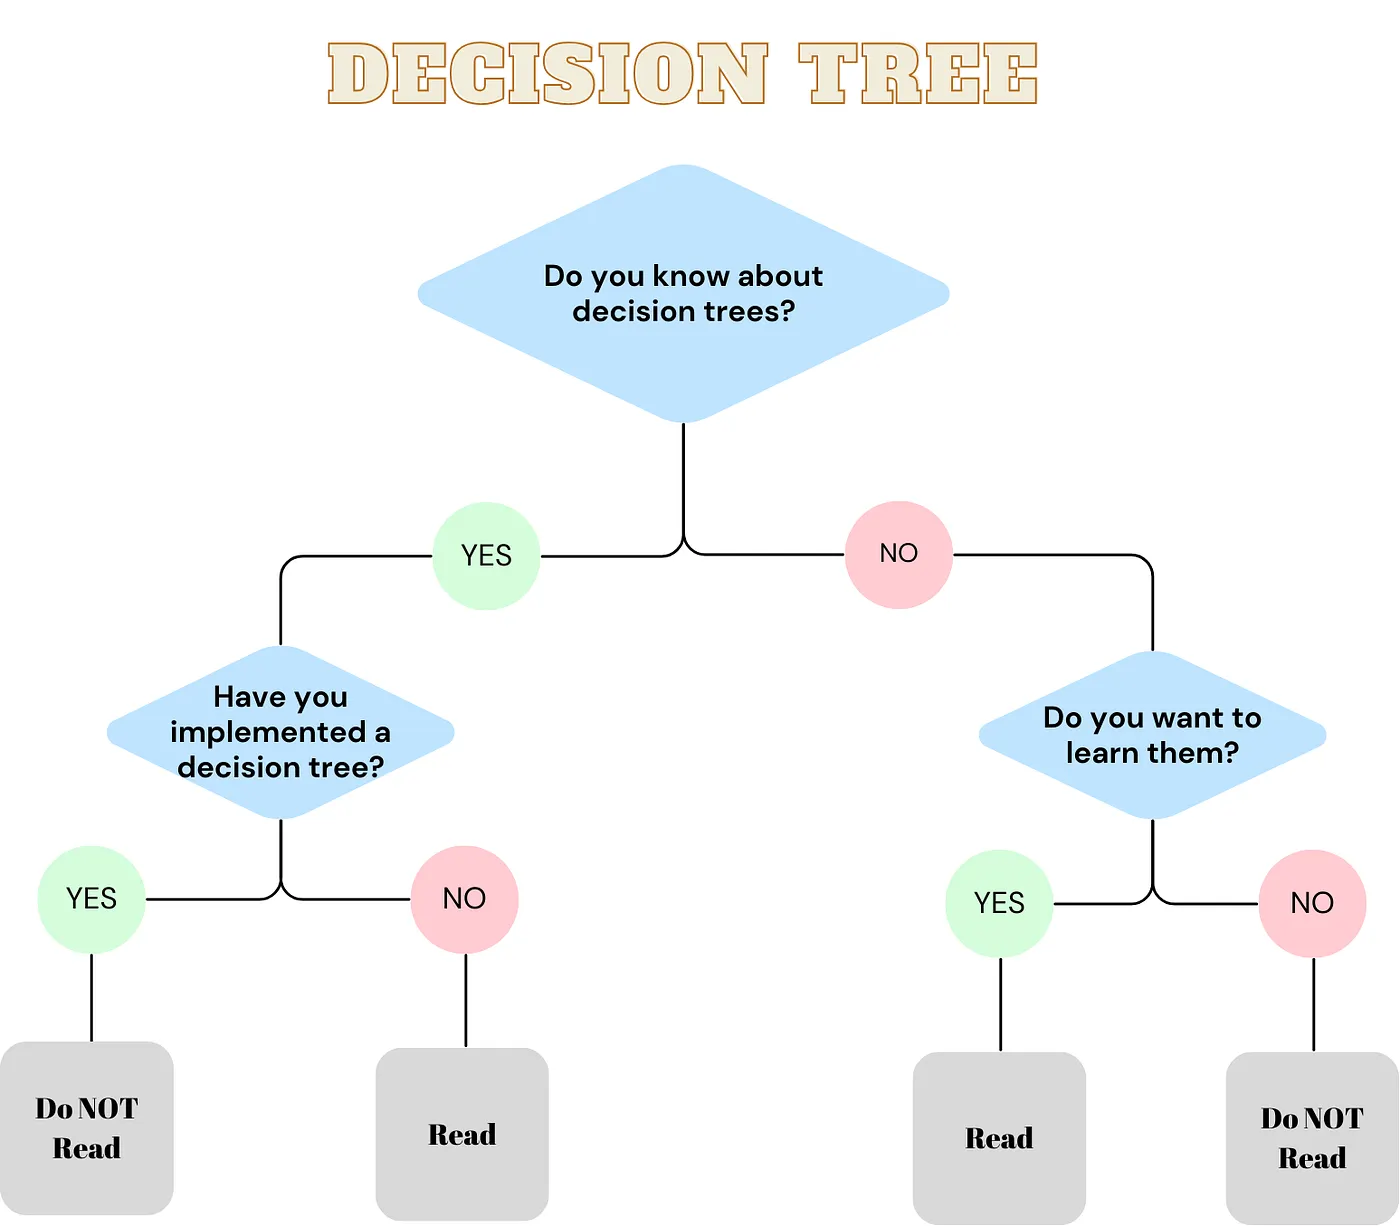


In [2]:
# import libraries
import pandas as pd

In [6]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [32]:
# Training dataset
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]
header = ["color", "diameter", "label"]

data = pd.DataFrame(training_data)
data.columns = header
data

,color,diameter,label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


In [33]:
# count number of examples in each class
data.label.value_counts()

label
Apple    2
Grape    2
Lemon    1
Name: count, dtype: int64

## details about Decision trees 
decision trees components:
- Root Node
- Decision Nodes
- Leaf Nodes (Terminal Nodes)
- Branches/Edges
- Splitting Criterion (e.g., Gini, entropy, information gain)
    - **gini**: measures the impurity in each node
    - **information gain**: measure the quality of the question we splitting on
- Stopping Criteria (max depth, min samples, etc.)
- Pruning Mechanisms (pre-pruning and post-pruning)

In [34]:
# this is a classification problem so we are using gini index or information gain or both
# now let's build the question class
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        print(example)
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))


In [37]:
# Let's write a question for a numeric attribute
Question(0, 5).match

<bound method Question.match of Is color >= 5?>